In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/stats302_image_recognition"

IMG_0241.jpeg  IMG_0307.jpeg  IMG_0372.jpeg  IMG_0437.jpeg  IMG_0503.jpeg  IMG_0567.jpeg
IMG_0242.jpeg  IMG_0308.jpeg  IMG_0373.jpeg  IMG_0438.jpeg  IMG_0504.jpeg  IMG_0568.jpeg
IMG_0243.jpeg  IMG_0309.jpeg  IMG_0374.jpeg  IMG_0439.jpeg  IMG_0505.jpeg  IMG_0569.jpeg
IMG_0244.jpeg  IMG_0310.jpeg  IMG_0375.jpeg  IMG_0440.jpeg  IMG_0506.jpeg  IMG_0570.jpeg
IMG_0245.jpeg  IMG_0311.jpeg  IMG_0376.jpeg  IMG_0441.jpeg  IMG_0507.jpeg  IMG_0571.jpeg
IMG_0246.jpeg  IMG_0312.jpeg  IMG_0377.jpeg  IMG_0442.jpeg  IMG_0508.jpeg  IMG_0572.jpeg
IMG_0247.jpeg  IMG_0313.jpeg  IMG_0378.jpeg  IMG_0443.jpeg  IMG_0509.jpeg  IMG_0573.jpeg
IMG_0248.jpeg  IMG_0315.jpeg  IMG_0379.jpeg  IMG_0444.jpeg  IMG_0510.jpeg  IMG_0574.jpeg
IMG_0249.jpeg  IMG_0316.jpeg  IMG_0380.jpeg  IMG_0445.jpeg  IMG_0511.jpeg  IMG_0575.jpeg
IMG_0250.jpeg  IMG_0317.jpeg  IMG_0381.jpeg  IMG_0446.jpeg  IMG_0512.jpeg  IMG_0576.jpeg
IMG_0251.jpeg  IMG_0318.jpeg  IMG_0382.jpeg  IMG_0447.jpeg  IMG_0513.jpeg  IMG_0577.jpeg
IMG_0253.jpeg  IMG_03

In [ ]:
folder_path = '/content/drive/My Drive/stats302_image_recognition'


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def resize_and_pad(img, size, pad_color=0):
    h, w = img.shape[:2]
    sh, sw = size

    if h > sh or w > sw:
        interp = cv2.INTER_AREA
    else:
        interp = cv2.INTER_CUBIC

    aspect = w / h

    if aspect > 1:
        new_w = sw
        new_h = np.round(new_w / aspect).astype(int)
        pad_vert = (sh - new_h) // 2
        pad_top, pad_bot = pad_vert, pad_vert
        pad_left, pad_right = 0, 0
    elif aspect < 1:
        new_h = sh
        new_w = np.round(new_h * aspect).astype(int)
        pad_horz = (sw - new_w) // 2
        pad_left, pad_right = pad_horz, pad_horz
        pad_top, pad_bot = 0, 0
    else:
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    if len(img.shape) == 3 and not isinstance(pad_color, (list, tuple, np.ndarray)):
        pad_color = [pad_color] * 3

    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right,
                                    borderType=cv2.BORDER_CONSTANT, value=pad_color)

    return scaled_img

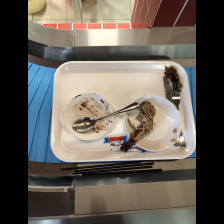

In [ ]:
# Test the function on one image
test_image_path = '/content/drive/My Drive/stats302_image_recognition/IMG_0246.jpeg'
image = cv2.imread(test_image_path)
resized_padded_image = resize_and_pad(image, (224, 224))

if resized_padded_image is not None:
    cv2_imshow(resized_padded_image)
else:
    print("The resize_and_pad function returned None")


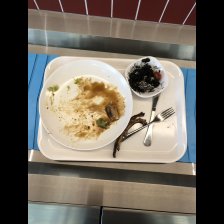

In [ ]:
from google.colab.patches import cv2_imshow

def process_images_from_directory(directory_path, target_size=(224, 224)):
    processed_images = []
    for filename in os.listdir(directory_path):
        if filename.lower().endswith((".jpeg")):
            image_path = os.path.join(directory_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                resized_padded_image = resize_and_pad(image, target_size)

                processed_images.append(resized_padded_image)
            else:
                print(f"Image {filename} not found or unable to read.")
    return processed_images


folder_path = '/content/drive/My Drive/stats302_image_recognition'
processed_images = process_images_from_directory(folder_path)

if processed_images:
    display_image = processed_images[0].astype(np.uint8)
    cv2_imshow(display_image)
else:
    print("No images were processed.")


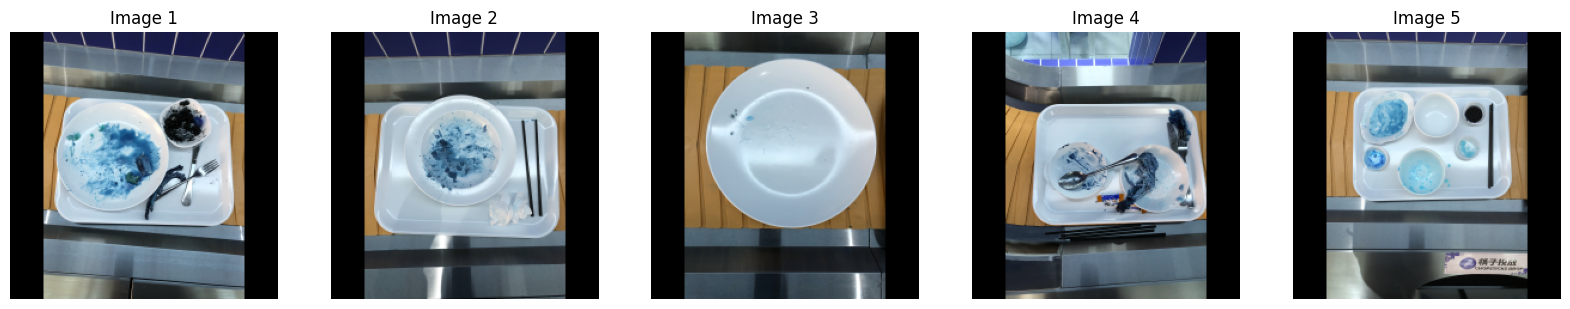

In [ ]:
import matplotlib.pyplot as plt

def show_processed_images(processed_images, num_images=5):
    plt.figure(figsize=(20, 10))
    for i in range(min(num_images, len(processed_images))):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(processed_images[i])
        plt.title(f"Image {i+1}")
        plt.axis("off")
    plt.show()

show_processed_images(processed_images)
